<a href="https://colab.research.google.com/github/matheusgneves/data-science-projects/blob/main/Machine_Learning_analisando_pistache_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.feature_selection import RFE

In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/selecao-de-features/main/dados/pistachio.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,73107,1161.8070,442.4074,217.7261,0.8705,305.0946,0.9424,77579,0.7710,2.0319,0.6806,0.6896,0.0061,0.0030,0.4756,0.9664,Kirmizi_Pistachio
1,89272,1173.1810,460.2551,251.9546,0.8369,337.1419,0.9641,92598,0.7584,1.8267,0.8151,0.7325,0.0052,0.0028,0.5366,0.9802,Siit_Pistachio
2,60955,999.7890,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.7200,0.0063,0.0034,0.5184,0.9591,Kirmizi_Pistachio
3,79537,1439.5129,466.7973,221.2136,0.8806,318.2289,0.9437,84281,0.7568,2.1102,0.4823,0.6817,0.0059,0.0028,0.4648,0.9807,Kirmizi_Pistachio
4,96395,1352.6740,515.8730,246.5945,0.8784,350.3340,0.9549,100950,0.7428,2.0920,0.6620,0.6791,0.0054,0.0026,0.4612,0.9648,Kirmizi_Pistachio


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

In [ ]:
# Separando os dois tipos de pistache por 0 e 1
df['Class'] = df['Class'].map({'Kirmizi_Pistachio': 0, 'Siit_Pistachio': 1})

In [ ]:
X = df.drop(['Class'], axis=1)

In [ ]:
y = df['Class']

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                        test_size=0.3,
                                                        random_state=50,
                                                        stratify=y)

In [ ]:
modelo = RandomForestClassifier(random_state=2)

In [ ]:
modelo.fit(X_treino, y_treino)

RandomForestClassifier(random_state=2)

In [ ]:
modelo.score(X_teste, y_teste)

0.8643410852713178

In [ ]:
df['Class'].value_counts()

,count
Class,
0,998
1,720


<Axes: xlabel='Class', ylabel='SOLIDITY'>

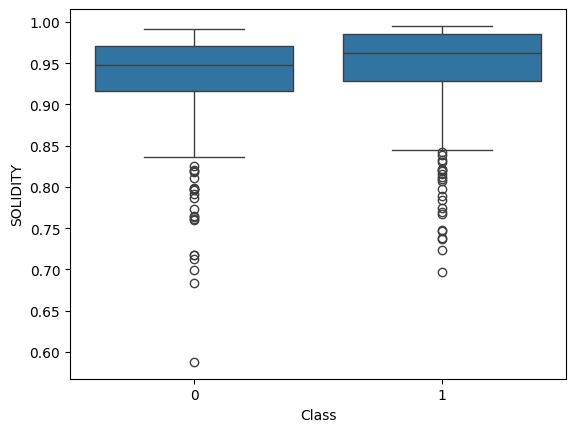

In [ ]:
 sns.boxplot(X_treino, x=y_treino, y='SOLIDITY')

In [ ]:
correlacao = pd.concat([X_treino, y_treino], axis=1).corr()

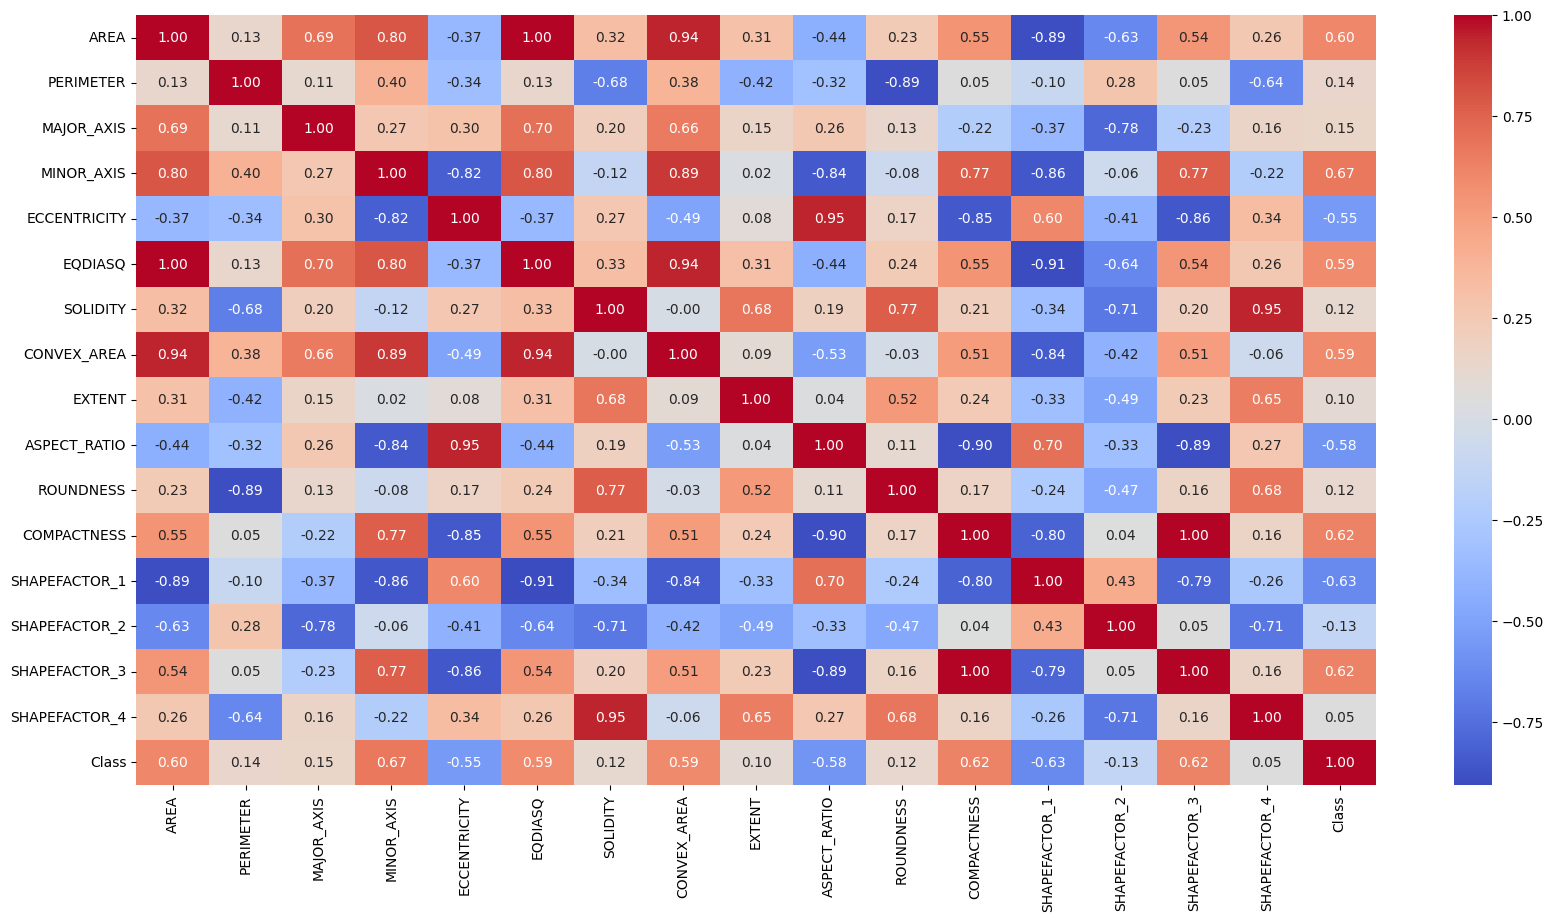

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

In [ ]:
importancia = pd.DataFrame({'colunas': X_treino.columns,
                            'importancia': modelo.feature_importances_})

importancia

,colunas,importancia
0,AREA,0.057268
1,PERIMETER,0.028737
2,MAJOR_AXIS,0.025804
3,MINOR_AXIS,0.179252
4,ECCENTRICITY,0.048316
5,EQDIASQ,0.036724
6,SOLIDITY,0.029009
7,CONVEX_AREA,0.054696
8,EXTENT,0.030028
9,ASPECT_RATIO,0.048584


In [ ]:
importancia_10 = importancia.sort_values(by='importancia', ascending=False).head(10)

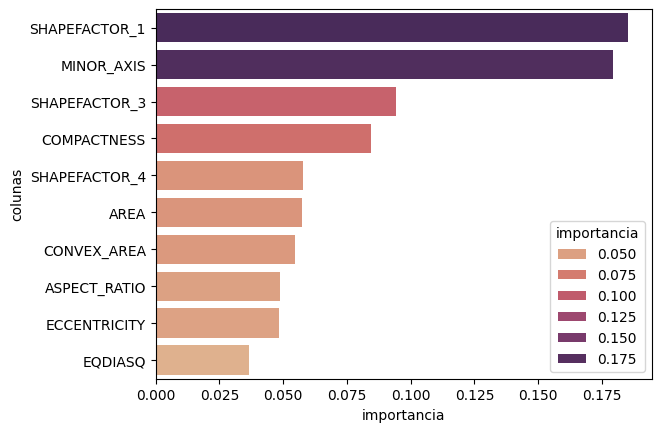

In [ ]:
sns.barplot(x='importancia', y='colunas', data=importancia_10, hue='importancia', palette='flare')

plt.show()

In [ ]:
modelo_fselecionadas = SelectFromModel(modelo, max_features=10, prefit=True)

In [ ]:
X_treino_selecionadas = modelo_fselecionadas.transform(X_treino)
X_teste_selecionadas = modelo_fselecionadas.transform(X_teste)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
modelo = RandomForestClassifier(random_state=2)

In [ ]:
modelo.fit(X_treino_selecionadas, y_treino)

RandomForestClassifier(random_state=2)

In [ ]:
modelo.score(X_teste_selecionadas, y_teste)

0.8643410852713178

In [ ]:
parametros_busca = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
grid_search = GridSearchCV(estimator=modelo, param_grid=parametros_busca,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [ ]:
grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.6199687 , 1.21492882, 2.35996561, 0.6300261 , 1.19758592,
        2.07788868, 0.81282787, 1.16902266, 1.91733546, 0.61053729,
        1.65401063, 1.76180429, 0.61406298, 1.28485451, 2.22413659,
        0.58753033, 1.18267632, 2.22614622, 0.64115548, 1.17152143,
        1.74679937, 0.7313807 , 1.51850519, 1.73983655, 0.60902772,
        1.39333124, 2.15357122, 0.60588059, 1.2051085 , 2.31200905,
        0.59106822, 1.16990724, 1.79850502, 0.88542547, 1.33586149,
        1.66876101]),
 'std_fit_time': array([0.01902279, 0.01225482, 0.34884679, 0.031     , 0.0136453 ,
        0.46727724, 0.15285489, 0.01320725, 0.21122952, 0.05898045,
        0.31037499, 0.01403815, 0.01372535, 0.16072728, 0.46204095,
        0.00734824, 0.01475145, 0.4040698 , 0.10446111, 0.00809055,
        0.02550428, 0.11006596, 0.37995822, 0.02944511, 0.01178147,
        0.27183982, 0.50740559, 0.01291965, 0.00722341, 0.37608145,
        0.01555922, 0.01108223, 0.08230752, 0.16504789, 0.201

In [ ]:
modelo_fselecionadas  = SelectFromModel(grid_search.best_estimator_, max_features=10, prefit=True)

In [ ]:
X_treino_selecionadas = modelo_fselecionadas.transform(X_treino)
X_teste_selecionadas = modelo_fselecionadas.transform(X_teste)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
modelo = grid_search.best_estimator_

In [ ]:
modelo.fit(X_treino_selecionadas, y_treino)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2)

In [ ]:
modelo.score(X_teste_selecionadas, y_teste)

0.874031007751938

In [ ]:
y_pred = modelo.predict(X_teste_selecionadas)

In [ ]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

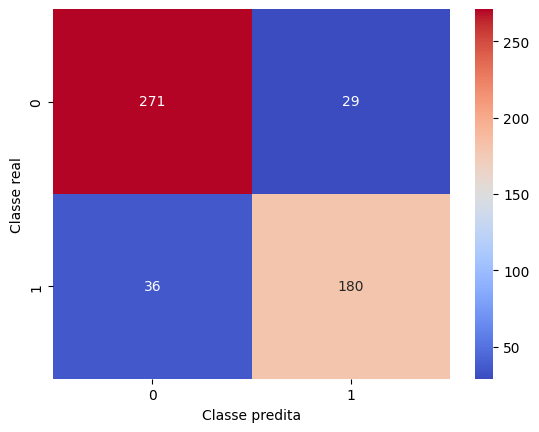

In [ ]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Classe predita')
plt.ylabel('Classe real')

plt.show()

In [ ]:
fpr, tpr, threshold = roc_curve(y_teste, y_pred)

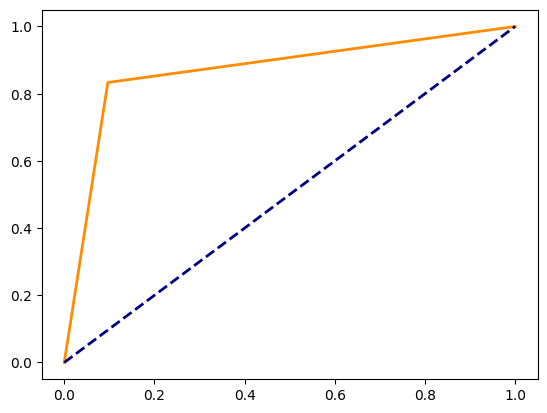

In [ ]:
plt.plot(fpr, tpr, label='ROC curve', color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

In [ ]:
roc_auc = auc(fpr, tpr)

roc_auc

np.float64(0.8683333333333334)

In [49]:
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [50]:
parametros = {'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200,
  'random_state': 2}

In [51]:
modelo = RandomForestClassifier(**parametros)

In [53]:
selecionador = RFE(modelo, n_features_to_select=10, step=1)

In [54]:
selecionador.fit(X_treino, y_treino)

RFE(estimator=RandomForestClassifier(max_depth=10, n_estimators=200,
                                     random_state=2),
    n_features_to_select=10)

In [55]:
X_treino_selecionadas = selecionador.transform(X_treino)
X_teste_selecionadas = selecionador.transform(X_teste)

In [56]:
modelo.fit(X_treino_selecionadas, y_treino)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2)

In [57]:
modelo.score(X_teste_selecionadas, y_teste)

0.8682170542635659

In [58]:
y_pred = modelo.predict(X_teste_selecionadas)

In [59]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

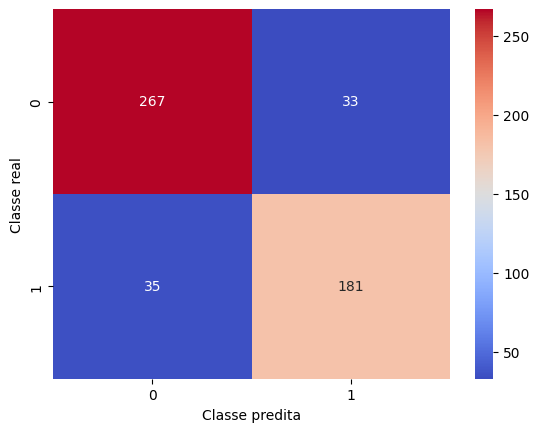

In [60]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Classe predita')
plt.ylabel('Classe real')

plt.show()